In [5]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customer_support_tickets.csv', 'customer_support_tickets'),
     # Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345',
    database='customer_satisfaction_prediction'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:/Users/User/Desktop/Untitled Folder'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()
    

Processing customer_support_tickets.csv
NaN values before replacement:
Ticket ID                          0
Customer Name                      0
Customer Email                     0
Customer Age                       0
Customer Gender                    0
Product Purchased                  0
Date of Purchase                   0
Ticket Type                        0
Ticket Subject                     0
Ticket Description                 0
Ticket Status                      0
Resolution                      5700
Ticket Priority                    0
Ticket Channel                     0
First Response Time             2819
Time to Resolution              5700
Customer Satisfaction Rating    5700
dtype: int64



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector


db = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "12345",
                            database = "customer_satisfaction_prediction")

cur = db.cursor()

# Total number of tickets raised

In [7]:
query="""select count(*) as total_tickets from customer_tickets;"""

cur.execute(query)

data=cur.fetchall()

df=pd.DataFrame(data,columns=["total tickets"])
print(df)

   total tickets
0           8469


# Count of ticket by status

In [8]:
query="""select ticket_status , count(*) from customer_tickets 
group by ticket_status"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["ticket status","ticket count"])
print(df)


               ticket status  ticket count
0  Pending Customer Response          2881
1                     Closed          2769
2                       Open          2819


# Average response time 

In [10]:
query="""select avg(first_response_hours) from customer_tickets """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["average resolution time"])
print(df)

  average resolution time
0                 12.0267


# Ticket distribution by type

            ticket type  ticket count
0       Technical issue          1747
1       Billing inquiry          1634
2  Cancellation request          1695
3       Product inquiry          1641
4        Refund request          1752


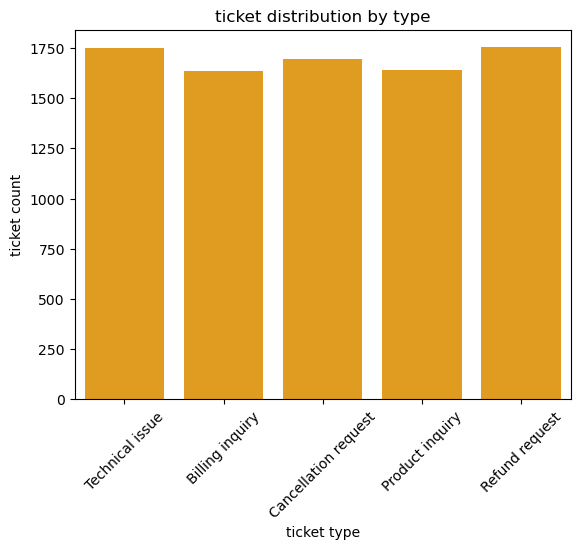

In [52]:
query="""select ticket_type , count(*) from customer_tickets
         group by ticket_type;"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["ticket type","ticket count"])
print(df)

sns.barplot(data=df , x="ticket type",y="ticket count",color="orange")
plt.xticks(rotation=45)
plt.title("ticket distribution by type")
plt.show()

# Ticket distribution by priority

  ticket priority  ticket count
0        Critical          2129
1             Low          2063
2            High          2085
3          Medium          2192


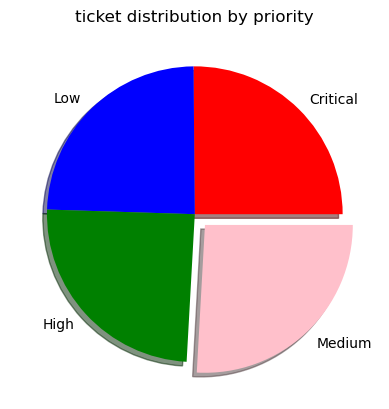

In [54]:
query="""select ticket_priority,count(*) from customer_tickets 
         group by ticket_priority"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["ticket priority","ticket count"])
print(df)

c=["red","blue","green","pink"]
ex=[0,0,0,0.1]
plt.pie(x=df["ticket count"],labels=df["ticket priority"],colors=c,shadow=True,explode=ex)
plt.title("ticket distribution by priority")
plt.show()

# Ticket distribution by channel

In [57]:
query="""select ticket_channel,count(*) from customer_tickets 
         group by ticket_channel"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["ticket channel","ticket count"])
print(df)


  ticket channel  ticket count
0   Social media          2121
1           Chat          2073
2          Email          2143
3          Phone          2132


# Customer age distribution

     age  customer count
0     18              51
1     18              60
2     18              52
3     19              61
4     19              51
..   ...             ...
154   69              61
155   69              47
156   70              48
157   70              58
158   70              50

[159 rows x 2 columns]


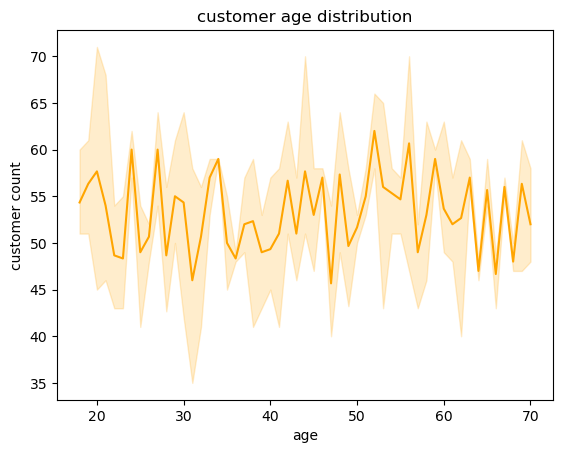

In [78]:
query="""select customer_age , count(*) from customer_tickets 
         group by customer_age, customer_gender
         order by customer_age"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["age","customer count"])
print(df)

sns.lineplot(data=df,x=df["age"],y=df["customer count"],color="orange")
plt.title("customer age distribution")
plt.show()

# Gender based ticket distribution

In [19]:
query ="""select customer_gender , count(*) from customer_tickets
          group by customer_gender
          order by customer_gender"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["gender","ticket count"])
print(df)

   gender  ticket count
0  Female          2887
1    Male          2896
2   Other          2686


# Top 5 customers who raised the most tickets

In [24]:
query ="""select customer_name , count(*) ticket_count from customer_tickets
          group by customer_name
          order by ticket_count desc
          limit 5"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["name","ticket count"])
print(df)

                name  ticket count
0        James Smith             5
1     Michael Garcia             5
2        David Smith             4
3  Christopher Jones             4
4     Steven Johnson             4


# Most commonly purchased products

In [27]:
query ="""select product_purchased, count(*) purchase_count from customer_tickets
          group by product_purchased
          order by purchase_count desc
          limit 10"""

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["product name","product count"])
print(df)

          product name  product count
0            Canon EOS            240
1           GoPro Hero            228
2      Nest Thermostat            225
3   Philips Hue Lights            221
4          Amazon Echo            221
5          LG Smart TV            219
6          Sony Xperia            217
7  Roomba Robot Vacuum            216
8        Apple AirPods            213
9              LG OLED            213


# Average first response time by priority

   priority average time to respond predicted time to response
0      High                 11.9290                    11.0000
1    Medium                 11.9502                    10.0000
2  Critical                 12.0585                    13.0000
3       Low                 12.1741                    12.0000


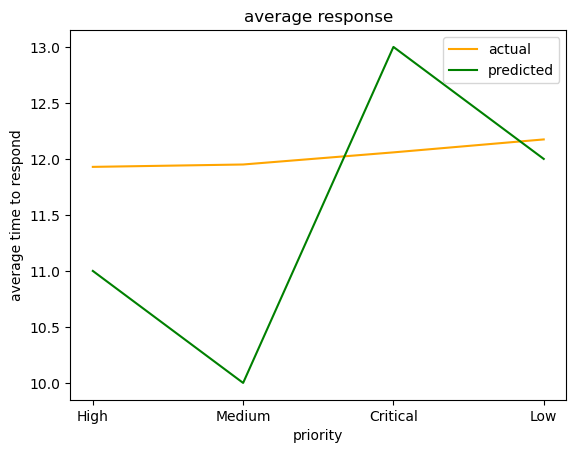

In [72]:
query ="""select ticket_priority, avg(first_response_hours) avg_first_response_time , avg(predicted_resolution_time) predicted_response_time 
          from customer_tickets
          group by ticket_priority
          order by avg_first_response_time
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["priority","average time to respond","predicted time to response"])
print(df)

sns.lineplot(data=df,x="priority",y="average time to respond", color="orange", label="actual")
sns.lineplot(data=df,x="priority",y="predicted time to response", color="green",label="predicted")
plt.title("average response")
plt.show()

# Tickets resolved on first response

In [33]:
query ="""select count(*)  from customer_tickets
          where date(time_to_resolution)=date(first_response_time)
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["first response resolved"])
print(df)

   first response resolved
0                     2558


# Average customer satisfaction rating

In [3]:
query ="""select avg(customer_satisfaction_rating) , avg(predicted_satisfaction)  from customer_tickets
          
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["average satisfaction"," predicted average satisfaction"])
print(df)

   average satisfaction  predicted average satisfaction
0              2.997166                          3.7295


# Satisfaction score by ticket type

In [85]:
query ="""select ticket_type,avg(customer_satisfaction_rating) , avg(predicted_satisfaction)  from customer_tickets
          group by ticket_type
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["ticket type","average satisfaction","predicted average satisfaction"])
print(df)



            ticket type  average satisfaction predicted average satisfaction
0       Technical issue              2.986262                         3.7127
1       Billing inquiry              3.009180                         3.7271
2  Cancellation request              3.008850                         3.7381
3       Product inquiry              3.005484                         3.7331
4        Refund request              2.977740                         3.7369


# Satisfaction score by ticket type and priority

             ticket type ticket priority  average satisfaction  \
0        Technical issue        Critical              3.022779   
1        Technical issue             Low              3.002421   
2        Billing inquiry             Low              3.027638   
3   Cancellation request             Low              3.053140   
4        Product inquiry        Critical              2.965261   
5         Refund request        Critical              2.984234   
6   Cancellation request            High              2.979899   
7        Product inquiry            High              3.070175   
8        Billing inquiry            High              3.036649   
9         Refund request             Low              3.027273   
10        Refund request            High              2.930804   
11  Cancellation request        Critical              2.966903   
12  Cancellation request          Medium              3.032609   
13       Product inquiry          Medium              3.015873   
14       T

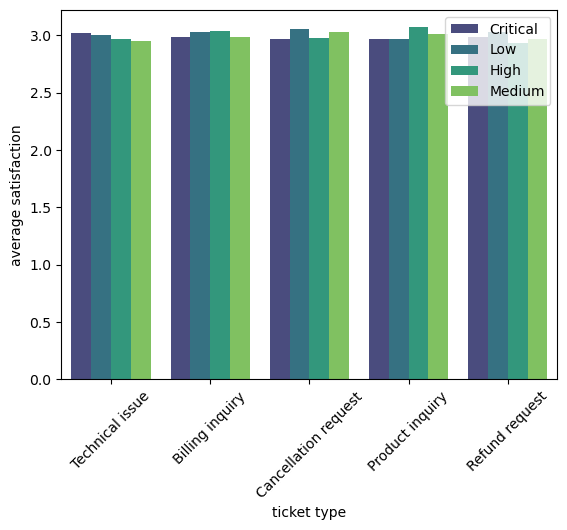

In [92]:
query ="""select ticket_type,ticket_priority,avg(customer_satisfaction_rating) , avg(predicted_satisfaction)  from customer_tickets
          group by ticket_type , ticket_priority
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["ticket type","ticket priority","average satisfaction"," predicted average satisfaction"])
print(df)

sns.barplot(data=df,x="ticket type",y="average satisfaction" ,palette="viridis", hue="ticket priority")
plt.xticks(rotation=45)
plt.legend(loc=1)
plt.show()

# Monthly ticket volume

      month  ticket count
0   2020-01           377
1   2020-02           376
2   2020-03           324
3   2020-04           354
4   2020-05           322
5   2020-06           358
6   2020-07           366
7   2020-08           327
8   2020-09           369
9   2020-10           373
10  2020-11           340
11  2020-12           350
12  2021-01           359
13  2021-02           339
14  2021-03           348
15  2021-04           364
16  2021-05           379
17  2021-06           320
18  2021-07           361
19  2021-08           364
20  2021-09           327
21  2021-10           362
22  2021-11           364
23  2021-12           346


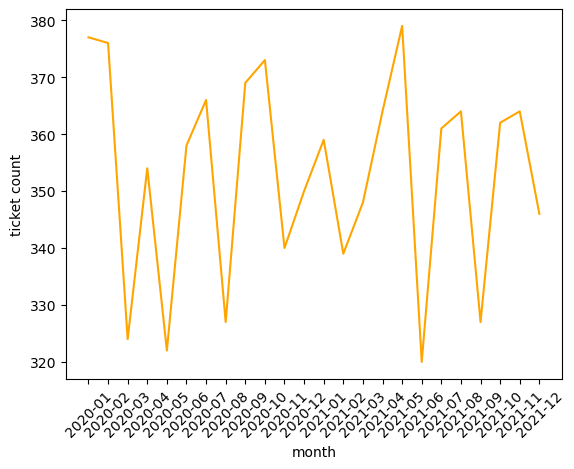

In [94]:
query ="""select date_format(date_of_purchase,"%Y-%m") mnth ,count(*) from customer_tickets
          group by mnth
          order by mnth
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["month","ticket count"])
print(df)

sns.lineplot(data=df,x="month",y="ticket count", color="orange")
plt.xticks(rotation=45)
plt.show()

# Ticket volume by Weekdays

In [45]:
query ="""select dayname(date_of_purchase) days ,count(*) from customer_tickets
          group by days
          order by field(days,"monday","tuesday","wednesday","thursday","friday","saturday","sunday")
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["days","ticket count"])
print(df)

        days  ticket count
0     Monday          1188
1    Tuesday          1263
2  Wednesday          1196
3   Thursday          1246
4     Friday          1182
5   Saturday          1196
6     Sunday          1198


# Most common ticket subject

In [48]:
query ="""select ticket_subject,count(*) from customer_tickets
          group by 1
          order by 2 desc
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["ticket subject","ticket count"])
print(df)

              ticket subject  ticket count
0             Refund request           576
1               Software bug           574
2      Product compatibility           567
3           Delivery problem           561
4             Hardware issue           547
5               Battery life           542
6            Network problem           539
7       Installation support           530
8              Product setup           529
9              Payment issue           526
10    Product recommendation           517
11            Account access           509
12  Peripheral compatibility           496
13                 Data loss           491
14      Cancellation request           487
15             Display issue           478


# Sentiment distribution

  sentiment  ticket count
0   neutral          4229
1  negative          3970
2  Positive           270


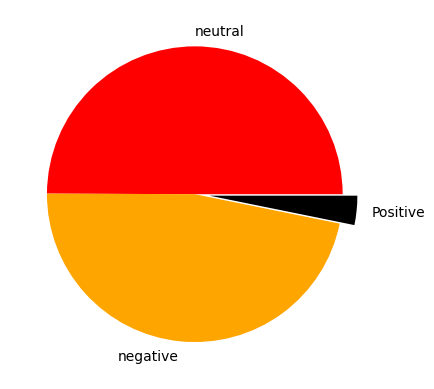

In [97]:
query ="""select sentiment,count(*) from customer_tickets
          group by 1
          order by 2 desc
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["sentiment","ticket count"])
print(df)
c=["red","orange","black"]
ex=[0,0,0.1]
plt.pie(df["ticket count"],labels=df["sentiment"],colors=c,explode=ex)
plt.show()

# Customer satisfaction vs ticket priority

In [50]:
query ="""select ticket_priority, avg(customer_satisfaction_rating) from customer_tickets
          group by 1
         
          """

cur.execute(query)
data=cur.fetchall()

df=pd.DataFrame(data,columns=["ticket priority","customer satisfaction rating"])
print(df)

  ticket priority  customer satisfaction rating
0        Critical                      2.985909
1             Low                      3.016481
2            High                      2.994245
3          Medium                      2.992701
